In [180]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from torch.utils.data import Dataset
import torch

In [256]:
# This class takes an npz file and turns it into a torch dataset so it can be the input of a dataloader
class NpzDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.img = data["images"]
        self.lab = data["labels"]

    def __getitem__(self, idx):
        return (self.img[idx], self.lab[idx])

    def __len__(self):
        return len(self.img)

In [257]:
# this function concatenates 5 train npz files into one train npz file
def concat_npz(path):
    images = []
    labels = []

    for set in range(0, 5):
        with np.load(path + "\\train_" + str(set) + ".npz") as data1:
            img1 = data1["images"]
            for img11 in img1:
                images.append(img11)
            lab1 = data1["labels"]
            for lab11 in lab1:
                labels.append(lab11)

    # Save the concatenated list to a new .npz file
    np.savez_compressed(
        r"C:\Users\carol\Documents\1ºAI\dtu_mlops-main\data\corruptmnist\train.npz",
        images=np.array(images),
        labels=np.array(labels),
    )

In [258]:
# create one single concatenated train npz file and load it
concat_npz(r"C:\Users\carol\Documents\1ºAI\dtu_mlops-main\data\corruptmnist")
data = np.load(
    r"C:\Users\carol\Documents\1ºAI\dtu_mlops-main\data\corruptmnist/train.npz"
)

# create a dataset from the npz file
dataset = NpzDataset(data)

# create a dataloader from the dataset
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

torch.Size([64, 28, 28])


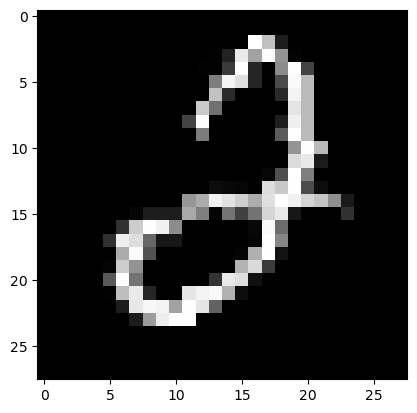

In [259]:
print(np.shape(images))
plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r");